Name : Sai Daitkar
Div : B

In [ ]:
import numpy as np
import pandas as pd

# Load Boston housing data manually from the original source
data_url = "http://lib.stat.cmu.edu/datasets/boston"
raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)

# Process the raw data
data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
target = raw_df.values[1::2, 2]

# Feature names from the original dataset
feature_names = [
    "CRIM", "ZN", "INDUS", "CHAS", "NOX", "RM", "AGE",
    "DIS", "RAD", "TAX", "PTRATIO", "B", "LSTAT"
]

# Create the DataFrame
boston_df = pd.DataFrame(data, columns=feature_names)
boston_df['MEDV'] = target  # Add target column

# View the first few rows
boston_df.head()


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [ ]:
data = pd.DataFrame(data, columns=[
    "CRIM", "ZN", "INDUS", "CHAS", "NOX", "RM", "AGE",
    "DIS", "RAD", "TAX", "PTRATIO", "B", "LSTAT"
])
data['PRICE'] = target
data.head(10)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
5,0.02985,0.0,2.18,0.0,0.458,6.430,58.7,6.0622,3.0,222.0,18.7,394.12,5.21,28.7
6,0.08829,12.5,7.87,0.0,0.524,6.012,66.6,5.5605,5.0,311.0,15.2,395.60,12.43,22.9
7,0.14455,12.5,7.87,0.0,0.524,6.172,96.1,5.9505,5.0,311.0,15.2,396.90,19.15,27.1
8,0.21124,12.5,7.87,0.0,0.524,5.631,100.0,6.0821,5.0,311.0,15.2,386.63,29.93,16.5
9,0.17004,12.5,7.87,0.0,0.524,6.004,85.9,6.5921,5.0,311.0,15.2,386.71,17.10,18.9


In [ ]:
#Shape of the data
print(data.shape)
#Checking the null values in the dataset
data.isnull().sum()

(506, 14)


,0
CRIM,0
ZN,0
INDUS,0
CHAS,0
NOX,0
RM,0
AGE,0
DIS,0
RAD,0
TAX,0


<ipython-input-16-6e69d4d32b98>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data.PRICE)


<Axes: xlabel='PRICE', ylabel='Density'>

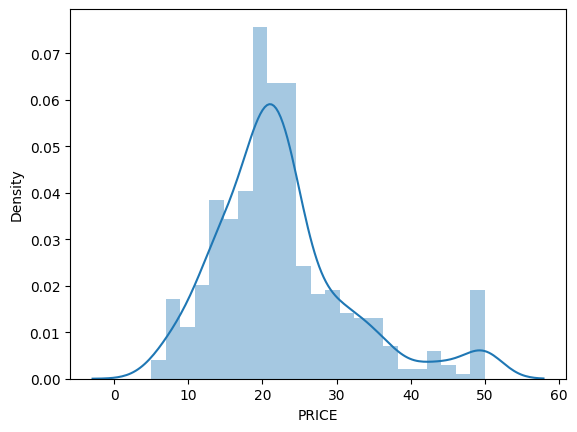

In [ ]:
#checking the distribution of the target variable
import seaborn as sns
sns.distplot(data.PRICE)
#The distribution seems normal, has not be the data normal we would have perform log transformation or took to square root of the data to make the data normal.
# Normal distribution is need for the machine learning for better predictiblity of the model

<Axes: ylabel='PRICE'>

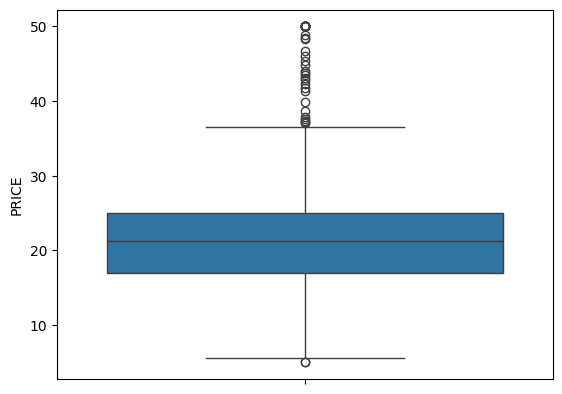

In [ ]:
#Distribution using box plot
sns.boxplot(data.PRICE)

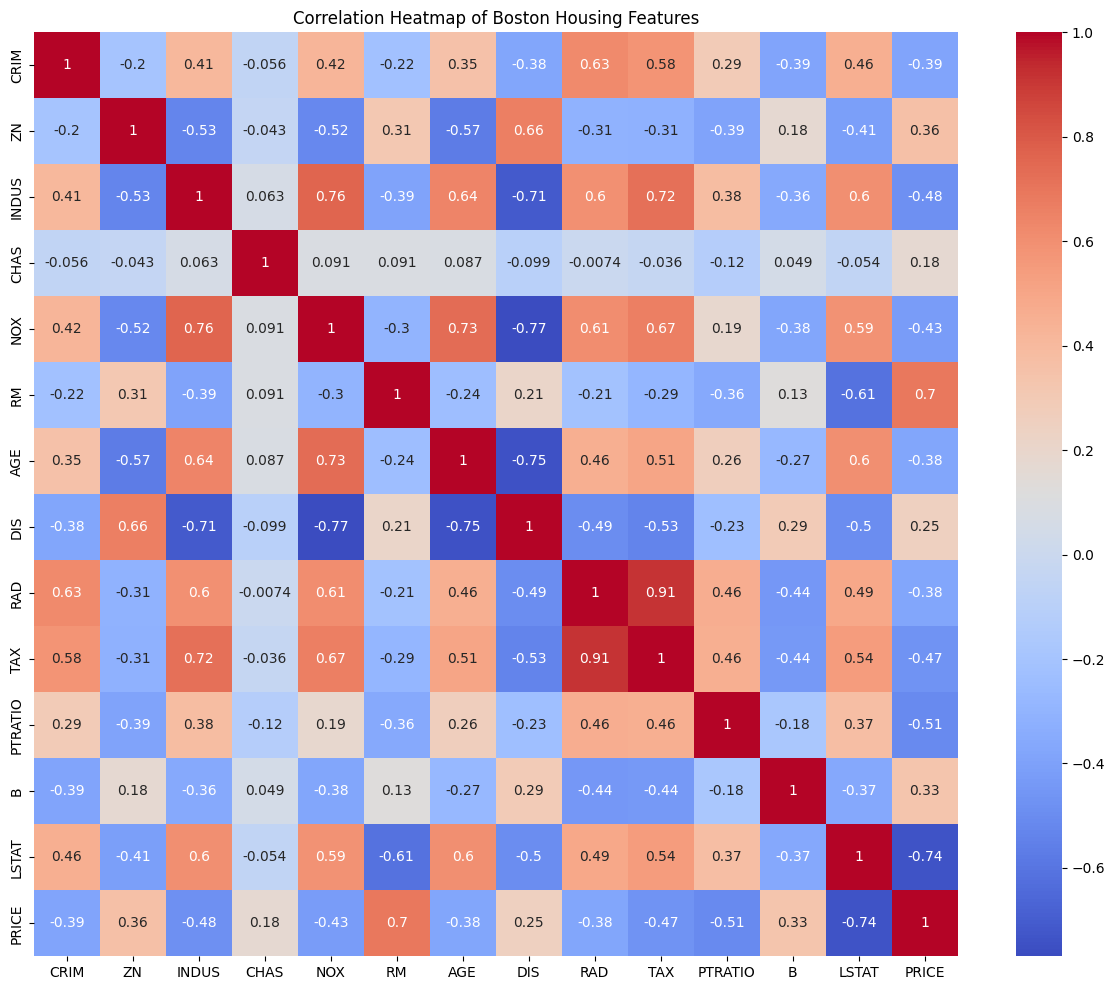

In [ ]:
correlation = data.corr()
correlation.loc['PRICE']

import matplotlib.pyplot as plt
import seaborn as sns

fig, axes = plt.subplots(figsize=(15, 12))
sns.heatmap(correlation, square=True, annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap of Boston Housing Features")
plt.show()


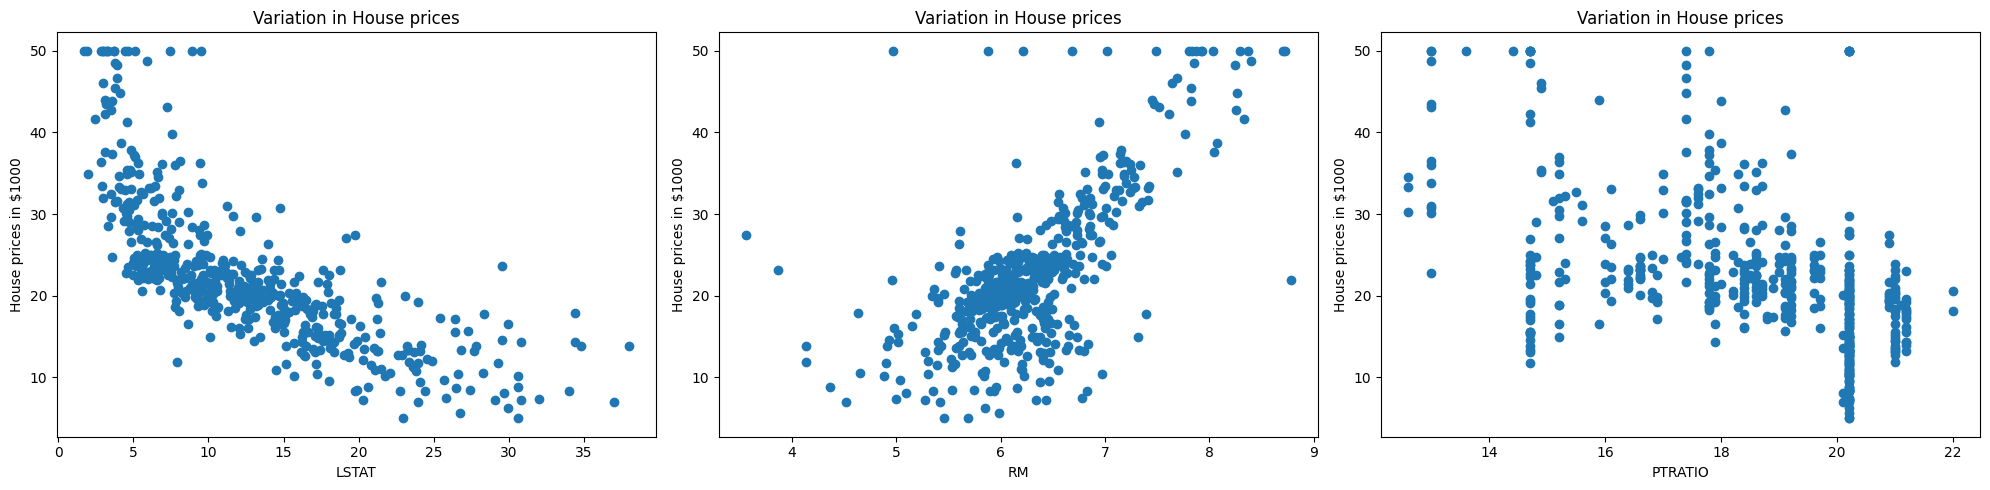

In [ ]:
plt.figure(figsize=(20, 5))
features = ['LSTAT', 'RM', 'PTRATIO']

for i, col in enumerate(features):
    plt.subplot(1, len(features), i + 1)
    x = data[col]
    y = data['PRICE']
    plt.scatter(x, y, marker='o')
    plt.title("Variation in House prices")
    plt.xlabel(col)
    plt.ylabel("House prices in $1000")

plt.tight_layout()
plt.show()


In [ ]:
# Import necessary libraries
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
from keras.models import Sequential
from keras.layers import Dense
from keras.utils import plot_model
import matplotlib.pyplot as plt
import plotly.graph_objects as go

# Splitting the data into dependent and independent variables
X = data.iloc[:, :-1]  # All columns except the last one (features)
y = data['PRICE']      # Last column as the dependent variable (target)

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalizing the dataset (Standardization)
sc = StandardScaler()
X_train = sc.fit_transform(X_train)  # Fit and transform on the training data
X_test = sc.transform(X_test)        # Only transform on the testing data

# Linear Regression Model
regressor = LinearRegression()
regressor.fit(X_train, y_train)

# Predicting on the test set
y_pred = regressor.predict(X_test)

# Evaluating the Linear Regression Model
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)
print(f'Linear Regression RMSE: {rmse}')
print(f'Linear Regression R-squared: {r2}')

# Neural Network Model
model = Sequential()
model.add(Dense(128, activation='relu', input_dim=X_train.shape[1]))  # Input layer
model.add(Dense(64, activation='relu'))  # Hidden layer 1
model.add(Dense(32, activation='relu'))  # Hidden layer 2
model.add(Dense(1))  # Output layer

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae'])

# Fit the model
history = model.fit(X_train, y_train, epochs=100, validation_split=0.05)

# Predicting on the test set
nn_pred = model.predict(X_test)

# Evaluating the Neural Network Model
nn_rmse = np.sqrt(mean_squared_error(y_test, nn_pred))
nn_r2 = r2_score(y_test, nn_pred)
print(f'Neural Network RMSE: {nn_rmse}')
print(f'Neural Network R-squared: {nn_r2}')

# Visualizing the Neural Network architecture
plot_model(model, to_file='model_architecture.png', show_shapes=True, show_layer_names=True)

# Plotting the loss curve
fig = go.Figure()
fig.add_trace(go.Scattergl(y=history.history['loss'], name='Train Loss'))
fig.add_trace(go.Scattergl(y=history.history['val_loss'], name='Validation Loss'))
fig.update_layout(height=500, width=700, xaxis_title='Epoch', yaxis_title='Loss')
fig.show()



Linear Regression RMSE: 4.928602182665336
Linear Regression R-squared: 0.668759493535632
Epoch 1/100


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


12/12 ━━━━━━━━━━━━━━━━━━━━ 7s 93ms/step - loss: 603.9944 - mae: 22.5837 - val_loss: 488.4428 - val_mae: 20.6244
Epoch 2/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 548.6918 - mae: 21.4893 - val_loss: 406.7101 - val_mae: 18.6688
Epoch 3/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 449.3212 - mae: 18.9746 - val_loss: 260.1602 - val_mae: 14.5035
Epoch 4/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - loss: 242.8915 - mae: 13.3405 - val_loss: 93.3343 - val_mae: 7.5019
Epoch 5/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 81.3693 - mae: 7.2333 - val_loss: 51.9718 - val_mae: 4.7307
Epoch 6/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - loss: 60.6014 - mae: 6.1230 - val_loss: 50.1304 - val_mae: 4.5625
Epoch 7/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 28.0745 - mae: 4.1224 - val_loss: 51.3699 - val_mae: 4.6706
Epoch 8/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 47ms/step - loss: 22.4576 - mae: 3.5598 - val_loss: 51.7529 - val_mae: 4.8941
Epoch 9/100
12/12 ━━━━━━━━━━━━━━━━━━━━

In [ ]:
# Ensure that you have compiled your model with 'mae' as a metric
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae'])

# Fit the model
history = model.fit(X_train, y_train, epochs=100, validation_split=0.05)

# Plotting Mean Absolute Error (MAE) during training and validation
import plotly.graph_objects as go

fig = go.Figure()

# Train MAE
fig.add_trace(go.Scattergl(y=history.history['mae'], name='Train MAE'))

# Validation MAE
fig.add_trace(go.Scattergl(y=history.history['val_mae'], name='Validation MAE'))

# Update layout
fig.update_layout(height=500, width=700,
                  xaxis_title='Epoch',
                  yaxis_title='Mean Absolute Error')

# Show the plot
fig.show()


Epoch 1/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 4s 21ms/step - loss: 3.9493 - mae: 1.5070 - val_loss: 14.4235 - val_mae: 2.5434
Epoch 2/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 4.2676 - mae: 1.5876 - val_loss: 15.8536 - val_mae: 2.5451
Epoch 3/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 3.8668 - mae: 1.4775 - val_loss: 17.3891 - val_mae: 2.6847
Epoch 4/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 4.2653 - mae: 1.4918 - val_loss: 14.7345 - val_mae: 2.6053
Epoch 5/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 3.6917 - mae: 1.4832 - val_loss: 16.5258 - val_mae: 2.5650
Epoch 6/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 3.8346 - mae: 1.4787 - val_loss: 13.7171 - val_mae: 2.4558
Epoch 7/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 3.9862 - mae: 1.4467 - val_loss: 16.1016 - val_mae: 2.6154
Epoch 8/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 3.7514 - mae: 1.4498 - val_loss: 14.8855 - val_mae: 2.5055
Epoch 9/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - lo

In [ ]:
from sklearn.preprocessing import StandardScaler

# New data point for prediction
new_data = [[0.1, 10.0, 5.0, 0, 0.4, 6.0, 50, 6.0, 1, 400, 20, 300, 10]]

# Standardize new data (same scaling as training data)
scaler = StandardScaler()
new_data_scaled = scaler.fit_transform(new_data)

# Make prediction
prediction = model.predict(new_data_scaled)

# Output prediction
print("Predicted house price:", prediction)



1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 127ms/step
Predicted house price: [[12.94152]]
